In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


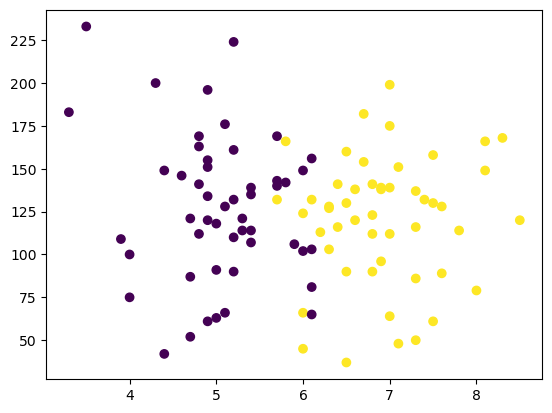

In [5]:

import matplotlib.pyplot as plt

plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

In [6]:
x=df.iloc[:,:2]
y=df.iloc[:,2]

In [7]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [8]:
y.shape

(100,)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [10]:
x_train

,cgpa,iq
87,5.7,132.0
78,6.1,81.0
94,4.7,52.0
84,5.7,169.0
95,4.3,200.0
...,...,...
20,6.6,120.0
61,7.3,137.0
76,4.9,155.0
41,5.4,114.0


In [11]:
y_train

87    1
78    0
94    0
84    0
95    0
     ..
20    1
61    1
76    0
41    0
24    0
Name: placement, Length: 90, dtype: int64

In [12]:
x_test

,cgpa,iq
65,8.1,166.0
81,5.4,107.0
77,7.3,50.0
43,6.8,141.0
49,5.4,135.0
26,7.0,199.0
60,6.9,139.0
23,4.7,87.0
64,7.0,64.0
67,5.0,118.0


In [13]:
y_test

65    1
81    0
77    1
43    1
49    0
26    1
60    1
23    0
64    1
67    0
Name: placement, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [40]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-2.19918655e-01,  2.05693088e-01],
       [ 1.31951193e-01, -1.09119053e+00],
       [-1.09959327e+00, -1.82863415e+00],
       [-2.19918655e-01,  1.14656944e+00],
       [-1.45146312e+00,  1.93487124e+00],
       [ 2.06723536e+00,  1.12114035e+00],
       [ 1.31951193e-01, -5.31750537e-01],
       [ 1.62739805e+00, -2.52030542e-01],
       [ 1.31951193e-01, -1.49805598e+00],
       [ 1.45146312e+00,  1.03976726e-01],
       [ 4.83821041e-01, -2.21007051e+00],
       [ 3.07886117e-01, -5.31750537e-01],
       [ 3.07886117e-01,  1.03976726e-01],
       [ 8.35690889e-01,  3.58267631e-01],
       [-9.23658351e-01,  2.56551269e-01],
       [-1.01162581e+00,  4.34554902e-01],
       [ 1.18756074e+00, -2.01172361e-01],
       [-9.23658351e-01, -9.94559985e-02],
       [ 4.83821041e-01,  1.54834907e-01],
       [-6.59755965e-01, -3.53746904e-01],
       [-9.23658351e-01,  6.88845808e-01],
       [ 9.23658351e-01,  1.29914398e+00],
       [-4.39837310e-02, -4.55463266e-01],
       [ 3.

In [41]:
x_test=scaler.transform(x_test)
x_test

array([[-3.570335  , -3.12373056],
       [-5.65966908, -3.16188224],
       [-4.18939695, -3.19874064],
       [-4.57631067, -3.13989652],
       [-5.65966908, -3.14377636],
       [-4.42154518, -3.10239148],
       [-4.49892792, -3.1411898 ],
       [-6.20134828, -3.17481501],
       [-4.42154518, -3.1896877 ],
       [-5.96920005, -3.15476921]])

In [42]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [43]:
clf.fit(x_train,y_train)

LogisticRegression()

In [44]:
ypred=clf.predict(x_test)

In [45]:
y_test

65    1
81    0
77    1
43    1
49    0
26    1
60    1
23    0
64    1
67    0
Name: placement, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.4

In [47]:
!pip install mlxtend

<Axes: >

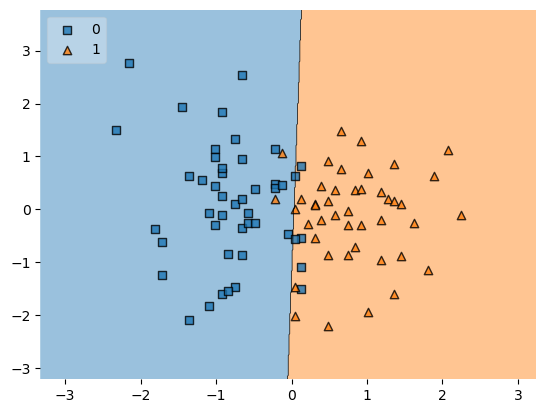

In [50]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [49]:
import pickle

In [24]:
pickle.dump(clf,open('model.pkl',"wb"))